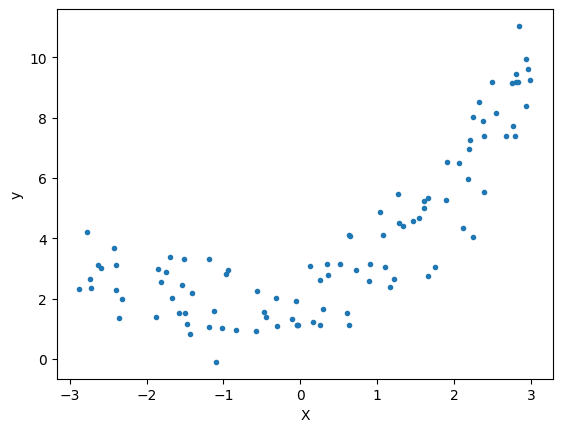

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the number of samples
m = 100  

# Generate random input values (features) in the range [-3, 3]
X = 6 * np.random.rand(m, 1) - 3  

# Compute the target values using a quadratic equation with some Gaussian noise
# y = 0.5 * X^2 + X + 2 + noise
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)  

# Plot the generated dataset
plt.plot(X, y, ".")  # Scatter plot of X vs. y
plt.xlabel('X')  # Label for the x-axis
plt.ylabel('y')  # Label for the y-axis
plt.show()  # Display the plot

In [2]:
from sklearn.preprocessing import PolynomialFeatures

# Create a polynomial feature transformer with degree 2 (quadratic features)
# Setting include_bias=False means no additional bias (intercept) term is added
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Transform the original feature matrix X to include polynomial terms (X and X^2)
X_poly = poly_features.fit_transform(X)

# Display the first transformed sample to observe the new feature representation
X[0]

array([-0.04270967])

In [3]:
# Display the first transformed sample to observe the polynomial features
X_poly[0]

array([-0.04270967,  0.00182412])

In [4]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
lin_reg = LinearRegression()

# Train the model using the polynomial features and target values
lin_reg.fit(X_poly, y)

# Retrieve the learned intercept and coefficients of the model
lin_reg.intercept_, lin_reg.coef_

(array([1.91807162]), array([[0.93925125, 0.53134975]]))

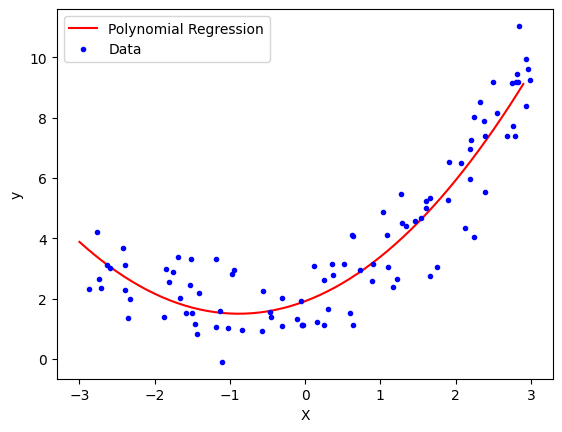

In [5]:
# Generate new input values for making predictions (range from -3 to 3 with step 0.1)
X_new = np.arange(-3, 3, 0.1)

# Compute predicted values using the trained polynomial regression model
y_lin_reg = lin_reg.coef_[0][1] * X_new**2 + lin_reg.coef_[0][0] * X_new + lin_reg.intercept_

# Plot the polynomial regression curve
plt.plot(X_new, y_lin_reg, "r-", label="Polynomial Regression")

# Plot the original data points
plt.plot(X, y, "b.", label="Data")

# Label the axes
plt.xlabel('X')
plt.ylabel('y')

# Add a legend for clarity
plt.legend()

# Display the plot
plt.show()

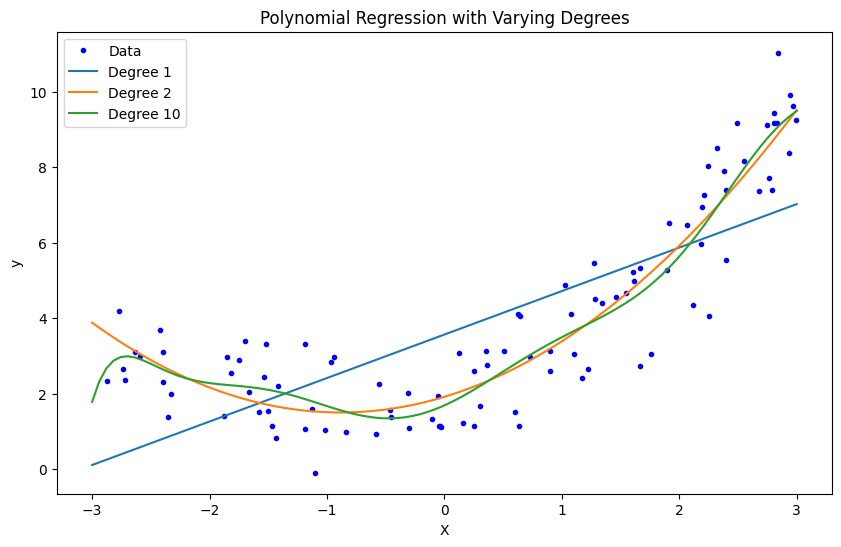

In [11]:
# Let's now test different degrees of Polynomial Regressors to understand how the predict the same dataset
from sklearn.pipeline import Pipeline

# Degrees to test.
degrees = [1, 2, 10]

# Generate new input values for smoother prediction curves.
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)

plt.figure(figsize=(10, 6))
plt.plot(X, y, "b.", label="Data")  # Original dataset.

# Fit and plot each polynomial regressor.
for degree in degrees:
    model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("lin_reg", LinearRegression())
    ])
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(X_plot, y_plot, label=f"Degree {degree}")

plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression with Varying Degrees")
plt.legend()
plt.show()

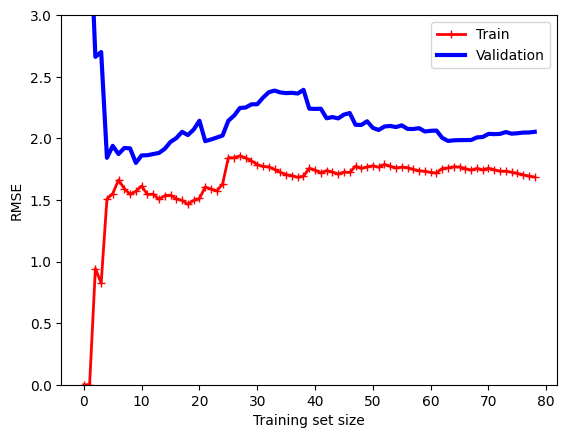

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    """
    Plots learning curves by evaluating the model's performance on increasing training set sizes.

    Parameters:
    model : The machine learning model to be trained.
    X : Feature matrix.
    y : Target variable.

    The function splits the dataset into training and validation sets, 
    trains the model on progressively larger subsets of the training data, 
    and calculates the root mean squared error (RMSE) for both training and validation sets.
    """
    
    # Split dataset into training and validation sets (80% training, 20% validation)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

    train_errors, val_errors = [], []  # Lists to store error values

    # Iterate over progressively larger training set sizes
    for m in range(1, len(X_train)):
        # Train the model on the first 'm' samples of the training set
        model.fit(X_train[:m], y_train[:m])

        # Predict on the training subset and validation set
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)

        # Compute and store the training and validation errors
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    # Plot the learning curves
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train")  # Training error curve
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation")  # Validation error curve
    plt.xlabel("Training set size")  # X-axis label
    plt.ylabel("RMSE")  # Y-axis label (Root Mean Squared Error)
    plt.ylim(0, 3)  # Set RMSE limits from 0 to 3
    plt.legend()  # Display legend
    plt.show()  # Show the plot

# Call the function to visualize learning curves using a linear regression model
plot_learning_curves(lin_reg, X, y)

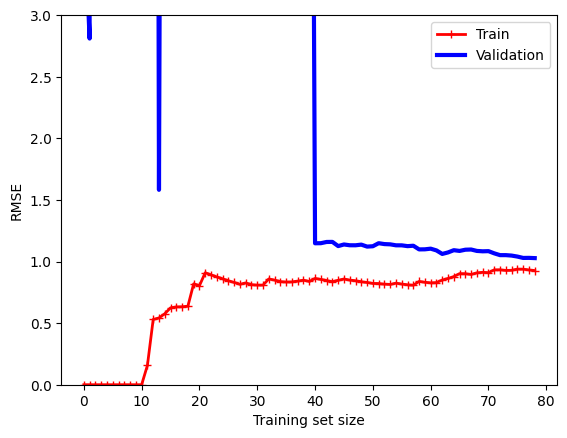

In [12]:
# Create a pipeline for polynomial regression with degree 10
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),  # Add polynomial features (degree 10)
    ("lin_reg", LinearRegression()),  # Apply linear regression on transformed features
])

# Plot learning curves to analyze training and validation error evolution
plot_learning_curves(polynomial_regression, X, y)